In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['xtick.labelsize'] = '16'
plt.rcParams['ytick.labelsize'] = '16'
plt.rcParams['axes.labelsize'] = '18'
plt.rcParams['axes.titlesize'] = '18'

### Distributions of data

Today, we are going to be talking about distributions of data. As astronomers, a huge amount of what we do involves taking observations in the form of catalogs and comparing them visually. Today, we're going to take a step back from space and think about my favorite sport, football, and play around with some data I grabbed for the 2023 NFL rosters.

In [2]:
nfl = pd.read_csv('data/players.csv')

nfl

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,height_inches
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,76.0
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,77.0
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,76.0
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,74.0
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,74.0
...,...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaN,NaN,DT,Forrest Merrill,73.0
1675,53994,6-5,300,NaN,NaN,C,Ryan McCollum,77.0
1676,53999,6-4,312,NaN,NaN,DT,Jack Heflin,76.0
1677,54006,6-6,330,NaN,NaN,T,Jake Curhan,78.0


# Types of variables

We have access to all kinds of information here, but I want to focus on three key columns: "weight", "height_inches", and  "officialPosition". The first two of these columns, weight and height, are what we call "numeric" variables--they span a range in values and can easily be represented by numbers. On the other hand, player position is what we call a "categorical" variable--it isn't something that you can easily represent as a set of numbers that have meanings attached to them. You're going to run into both kinds of variables during the astronomy modules over the summer, so today we're going to talk a bit about the way we use them. Let's start with the numeric variables and the way we describe their distributions.

Even for numeric variables, there is often some amount of rounding that goes into making a data set. Let's take a look again at the height and weight variables. What can we tell about the way this data is binned? What is the smallest difference in height units we can see?

In [3]:
nfl

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,height_inches
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,76.0
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,77.0
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,76.0
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,74.0
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,74.0
...,...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaN,NaN,DT,Forrest Merrill,73.0
1675,53994,6-5,300,NaN,NaN,C,Ryan McCollum,77.0
1676,53999,6-4,312,NaN,NaN,DT,Jack Heflin,76.0
1677,54006,6-6,330,NaN,NaN,T,Jake Curhan,78.0


# Describing a distribution

When we are looking at numeric variables that span a really wide range in values, one of the first things that we often do is plot the data to understand how it is distributed. We do this by counting the data in bins and plotting, more making what's called a histogram. When we make a histogram, we get to make a ton of choices about how we decide to show the data, but let's start by just using the defaults in matplotlib for plotting the distribution of player height.

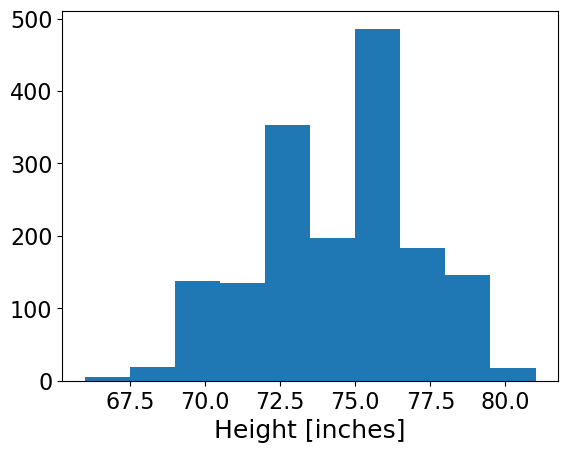

In [4]:
plt.hist(nfl['height_inches'])
plt.xlabel('Height [inches]')
plt.show()

This histogram looks a bit choppy, probably because the data isn't being binned well by default. Usually, we'll want to have a bit more control than the defaults for making these kinds of plots. We can do that by using the "bins" keyword, where we get to decide how we want to divide the data. Before we do that, let's talk about one of the first statistics that we use to describe a distribution: the minimum, the maximum, and the range.

The minimum and maximum of a distribution are almost always the first things we try to measure when we're trying to learn about how data is distributed. The range follows from those: it is the maximum value of the data minus the minimum value of the data. Let's use numpy to measure those below for the height of the players.

In [5]:
print('Minimum Player Height:', np.min(nfl['height_inches']))
print('Maximum Player Height:', np.max(nfl['height_inches']))
print('Range of Player Heights:', np.max(nfl['height_inches']) - np.min(nfl['height_inches']))

Minimum Player Height: 66.0
Maximum Player Height: 81.0
Range of Player Heights: 15.0


So we can see that the shortest player is 66 inches (5'5"), the tallest player is 81 inches (6'8"). The range in height is 15", that is: the tallest player is 15" taller than the shortest player. Let's try remaking our histogram where every bin is 1" in height, so we have 15 total bins. To do so, we'll use a function called np.arange(), which takes inputs of the minimum, the maximum (you should add 2 to this to make sure you include the biggest value), and the step that you want to use.

Bins: [66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82]


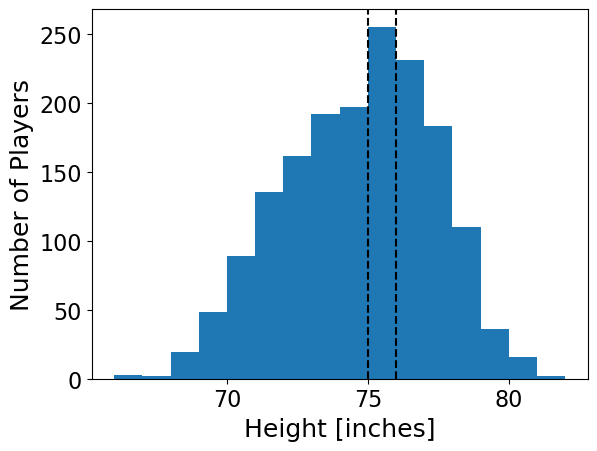

In [6]:
bins = np.arange(66, 83, 1)

print('Bins:', bins)

plt.hist(nfl['height_inches'], bins=bins)
plt.axvline(75, color='black', ls='--')
plt.axvline(76, color='black', ls='--')
plt.xlabel('Height [inches]')
plt.ylabel('Number of Players')

plt.show()

The way that we can read this off is that there are around 250 players whose height is 75", and that's the most common value in our distribution. More accurately, this histogram is telling us that the bin where 75" <= height < 76" has the most players. It's important to note that the histogram bin does not include the upper value of the bin, just the lower value.

Let's read this off a bit more systematically using pandas; we can have it print how many times each value appears--this is better than eyeballing it from a histogram if the data is already binned. But for some more continuous distributions, as we'll see in a bit, this won't work as well.

In [7]:
nfl['height_inches'].value_counts()

height_inches
75.0    255
76.0    231
74.0    197
73.0    192
77.0    183
72.0    161
71.0    135
78.0    110
70.0     89
69.0     48
79.0     36
68.0     19
80.0     16
66.0      3
81.0      2
67.0      2
Name: count, dtype: int64

In [8]:
mode_nfl_height = 75

To get an idea of a situation where the mode might be a bit trickier, let's look instead at a more continuous distribution of heights. For this, I'm going to use some of the numpy random variables to generate some fake data--let's imagine that we can sample 10000 men and measure their heights perfectly, knowing the distribution they're drawn from (we'll get to what these mean in a second). What do we notice that looks different about the distribution of heights here?

In [9]:
height_distro_all = pd.DataFrame(np.random.normal(70.23622, 3, 10000), columns=['height'])

height_distro_all

,height
0,66.164794
1,72.166661
2,71.055748
3,68.051763
4,67.681398
...,...
9995,76.185918
9996,68.707953
9997,67.044874
9998,72.400075


In this case, the data really is distributed continuously, which means that we can't just ask what the "most common value" is. Every precise value appears precisely once, as you can see below:

In [10]:
height_distro_all['height'].value_counts()

height
66.164794    1
74.967307    1
69.378212    1
65.665526    1
70.014427    1
            ..
69.511910    1
67.543420    1
68.326119    1
66.393931    1
71.559495    1
Name: count, Length: 10000, dtype: int64

This is part of why the mode is often not the best statistic to describe real data that is drawn from a continuous distribution. What you actually measure as the mode is very sensitive to how you decide to bin your data. This is why we instead tend to rely on more stable statistics like the median to characterize our data.

The median can be measured by taking your data, putting it in order from smallest to largest, and finding the value right in the middle. Let's try this for our NFL player heights.

In [11]:
nfl_height_sorted = np.sort(nfl['height_inches'])
print('Sorted heights:', nfl_height_sorted)

median_nfl_height = nfl_height_sorted[len(nfl_height_sorted)//2]

print('Median NFL Height', median_nfl_height)

Sorted heights: [66. 66. 66. ... 80. 81. 81.]
Median NFL Height 74.0


In practice, we can do this by just using a nice built in numpy function for the median:

In [12]:
print('Median NFL Height', np.median(nfl_height_sorted))

Median NFL Height 74.0


What do we notice about the median here and how it relates to the mode? In order to investigate, let's plot our histogram again. This time, I'm going to shift the alignment a bit with a keyword so that the middles of the bins line up with the values instead of the edge, just so it's easier to visualize.

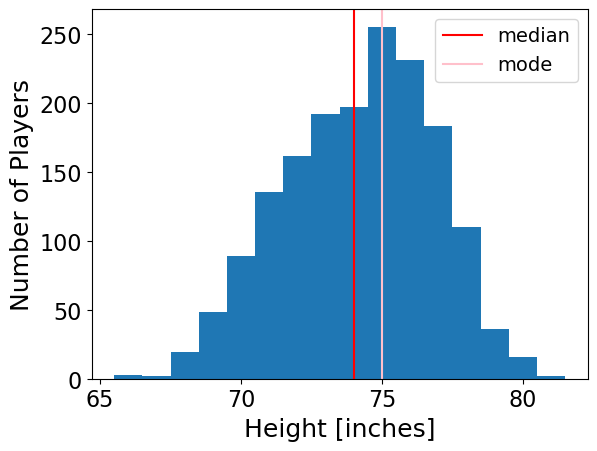

In [13]:
plt.hist(nfl['height_inches'], bins=bins, align='left')
plt.axvline(74, color='red', label='median')
plt.axvline(75, color='pink', label='mode')
plt.legend(fontsize=14)
plt.xlabel('Height [inches]')
plt.ylabel('Number of Players')

plt.show()

The fact that the mean and the median of the data are different than one another is our first indication that our data is "skewed". Now that we know we're looking for it, what signs can we see in the data that tell us this might be the case? And thinking more about what the dataset is we're looking at, why do we think this might be the case?

Let's think about one more statistic that we can use to describe data: the average (or "mean"). To calculate the mean, you just add up all the data points and then divide by the number of data points. It's another really valuable tool to characterize data, but as we'll see in a second it has some failure modes that you should be aware of. Let's calculate it by hand and by using numpy, and then overplot on the distribution so we can see how it compares to the median and mode.

Mean NFL Height: 74.19594997022037 74.19594997022037


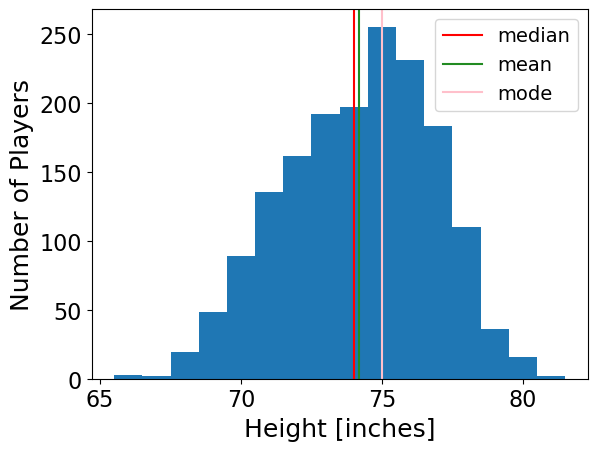

(1679, 1696)

In [16]:
mean_nfl_height = np.sum(nfl['height_inches'])/len(nfl)
mean_nfl_height_numpy = np.mean(nfl['height_inches'])

print('Mean NFL Height:', mean_nfl_height, mean_nfl_height_numpy)

plt.hist(nfl['height_inches'], bins=bins, align='left')
plt.axvline(median_nfl_height, color='red', label='median')
plt.axvline(mean_nfl_height, color='forestgreen', label='mean')
plt.axvline(mode_nfl_height, color='pink', label='mode')
plt.legend(fontsize=14)
plt.xlabel('Height [inches]')
plt.ylabel('Number of Players')

plt.show()

len(nfl), 53*32

Of the statistics that we've discussed, the mean is the most susceptible to the effect of outliers. Let's imagine a world where we add a new division of 4 NFL teams that each have 22 aliens who are insanely tall, let's say 180 inches (15 feet). Let's look at how the median and the mean shift when we add these new "outliers" into our distribution.

New mean: 79.46519524617996
New median: 75.0


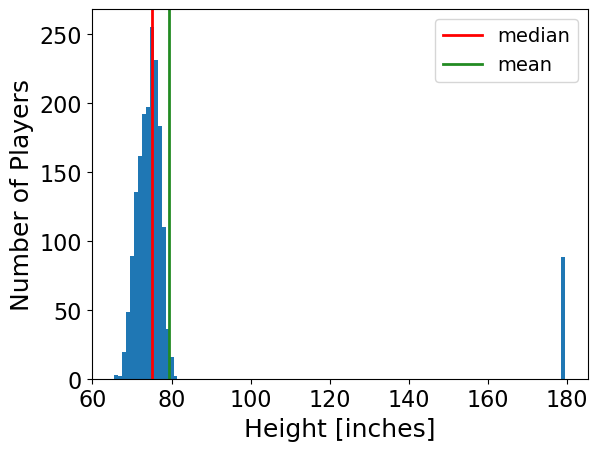

In [17]:
new_nfl_height = np.concatenate([nfl['height_inches'], [180]*22*4])
new_bins = np.arange(66, 181, 1)

print('New mean:', np.mean(new_nfl_height))
print('New median:', np.median(new_nfl_height))

plt.hist(new_nfl_height, bins=new_bins, align='left')
plt.axvline(np.median(new_nfl_height), color='red', label='median', lw=2)
plt.axvline(np.mean(new_nfl_height), color='forestgreen', label='mean', lw=2)
plt.legend(fontsize=14)
plt.xlabel('Height [inches]')
plt.ylabel('Number of Players')
plt.show()

Now, let's think about the "spread" of data. We've already kind of gotten at this with the range--we showed that the NFL player heights have a minimum of 66" and a maximum of 81". But what does that distribution of heights actually look like? For an illustrative example, let's look at a distribution that has the same range as our real players, but instead of being peaked, it's "uniform" through that range. I'm also going to do some of the type of plotting I usually use to put two histograms on top of one another.

[66.         66.00953516 66.01907032 ... 81.98092968 81.99046484
 82.        ]
Median NFL Height: 74.0
Median from Flat Distribution: 74.0


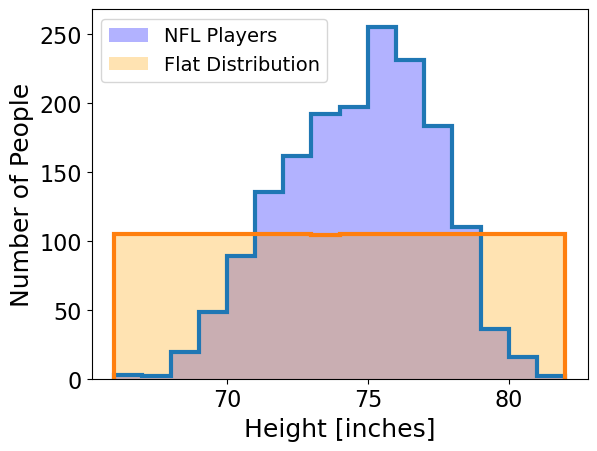

In [18]:
flat_distro = np.linspace(np.min(nfl['height_inches']), np.max(nfl['height_inches'])+1, len(nfl))

print(flat_distro)

print('Median NFL Height:', np.median(nfl['height_inches']))
print('Median from Flat Distribution:', np.median(flat_distro))


plt.hist(nfl['height_inches'], bins=bins, histtype='step', lw=3)
plt.hist(nfl['height_inches'], bins=bins, alpha=0.3, color='blue', label='NFL Players')
plt.hist(flat_distro, bins=bins, histtype='step', lw=3)
plt.hist(flat_distro, bins=bins, alpha=0.3, color='orange', label='Flat Distribution')
plt.legend(fontsize=14)
plt.xlabel('Height [inches]')
plt.ylabel('Number of People')
plt.show()

These data have exactly the same median, but clearly the distributions aren't the same! We can quantify these differences by looking at the "spread" of the data. To start, let's think about the "percentiles" of the distribution. These are the "spread" equivalents of the median--they just take the data, order it from smallest to largest, and ask the questions like "what is the 25th percentile of the distribution?" Before we calculate those, let's try a different way of visualizing the distributions.

Before, when we were looking at histograms, we were looking at how many people were in each bin of height. What if instead we think about how many <b>more</b> people are in each consecutive bin of height? This is what's called a "cumulative" distribution, where we step through the data in bins and ask "what cumulative fraction of the data is contained in that bin". It's really common to make these plots so that their y-axis goes from 0 to 1, where 0 means that 0% of the data is contained up to that bin, 0.5 means 50% has been reached at that bin, and 1 means 100% of the data has been reached by that bin. Let's take a look at what this looks like for our NFL heights. We can immediately read the median off of this chart--let's show that by putting a line at 0.5 (50%), which is the line that divides half the data like a median, and 74, the value we know is the median. 

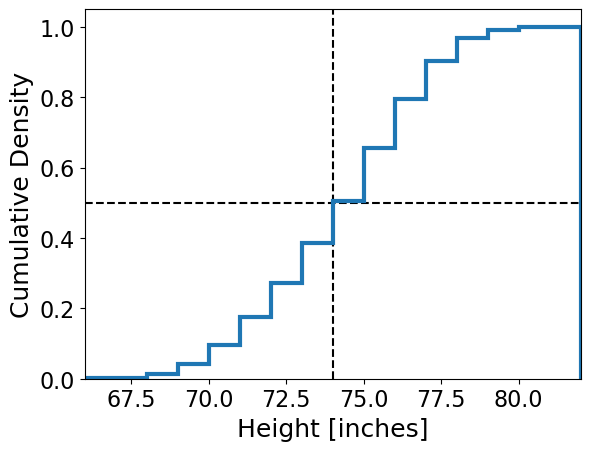

In [19]:
plt.hist(nfl['height_inches'], cumulative=True, density=True, bins=bins, histtype='step', lw=3)

plt.axhline(0.5, color='black', ls='--', zorder=-10)
plt.axvline(median_nfl_height, color='black', ls='--', zorder=-10)

plt.xlim(np.min(flat_distro), np.max(flat_distro))
plt.xlabel('Height [inches]')
plt.ylabel('Cumulative Density')
plt.show()

Now let's take a look at this plot where we show the flat distribution. Before we do, what do we think that will look like at the edges? What do we think it will look like near the center?

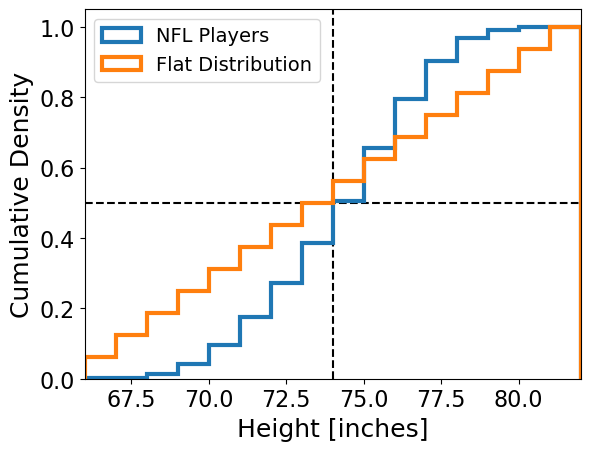

In [20]:
plt.hist(nfl['height_inches'], cumulative=True, density=True, bins=bins, histtype='step', lw=3, label='NFL Players')
plt.hist(flat_distro, cumulative=True, density=True, bins=bins, histtype='step', lw=3, label='Flat Distribution')

plt.axhline(0.5, color='black', ls='--', zorder=-10)
plt.axvline(median_nfl_height, color='black', ls='--', zorder=-10)

plt.xlim(np.min(flat_distro), np.max(flat_distro))
plt.xlabel('Height [inches]')
plt.ylabel('Cumulative Density')
plt.legend(fontsize=14)
plt.show()

We can read straight off a plot like this that the medians are the same for these two distributions, just like we calculated. So we have two distributions with exactly the same median and exactly the same total range (15 inches), but we can clearly see that they are different from one another. Now, let's think about a new measure of the spread, the "interquartile range (IQR)". This statistic asks what the range is not between the full range of data, but instead between the 75th and 25th percentile of the data. Before we calculate it ourselves, let's take a look at what it might look like on this plot. Which of these data sets do we think the IQR will be bigger for?

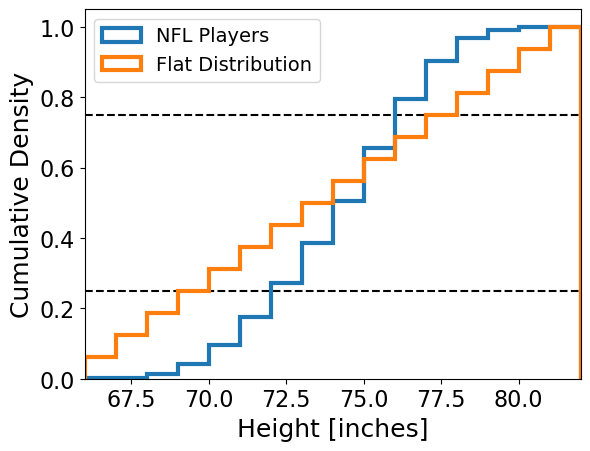

In [21]:
plt.hist(nfl['height_inches'], cumulative=True, density=True, bins=bins, histtype='step', lw=3, label='NFL Players')
plt.hist(flat_distro, cumulative=True, density=True, bins=bins, histtype='step', lw=3, label='Flat Distribution')

plt.axhline(0.75, color='black', ls='--', zorder=-10)
plt.axhline(0.25, color='black', ls='--', zorder=-10)

plt.xlim(np.min(flat_distro), np.max(flat_distro))
plt.xlabel('Height [inches]')
plt.ylabel('Cumulative Density')
plt.legend(fontsize=14)
plt.show()

Now, let's measure these. To do so, we can use a function in numpy called "percentile" that is really similar to "median", but instead of just finding the 50th percentile, you get to give an argument that tells it which percentile you'd like to find. Let's measure the 75th and 25th percentiles for each of these distributions and look at the IQRs.

In [22]:
nfl_height_25 = np.percentile(nfl['height_inches'], 25)
nfl_height_75 = np.percentile(nfl['height_inches'], 75)
IQR_nfl_height = nfl_height_75 - nfl_height_25

print('NFL Height Percentiles [25% and 75%]:', nfl_height_25, nfl_height_75)
print('NFL Height IQR:', IQR_nfl_height)

flat_height_25 = np.percentile(flat_distro, 25)
flat_height_75 = np.percentile(flat_distro, 75)
IQR_flat_height = flat_height_75 - flat_height_25

print('Flat Height Percentiles [25% and 75%]:', flat_height_25, flat_height_75)
print('Flat Height IQR:', IQR_flat_height)

NFL Height Percentiles [25% and 75%]: 72.0 76.0
NFL Height IQR: 4.0
Flat Height Percentiles [25% and 75%]: 70.0 78.0
Flat Height IQR: 8.0


Here, we quantitatively are showing what we saw by eye: that the flat distribution has a higher spread, or "dispersion", than the real distribution of heights that we're looking at. If the interquartile range is similar to the median, we can also measure the dispersion in a way that is similar to the mean. This is called the standard deviation, and it's a measure of how much your data deviates from the mean. We can also show that the flat distribution has a bigger spread than the real distribution using this.

In [23]:
std_nfl_height = np.std(nfl['height_inches'])
std_flat_height = np.std(flat_distro)

print('NFL Standard Deviation:', std_nfl_height)
print('Flat Standard Deviation:', std_flat_height)

NFL Standard Deviation: 2.6447980632916166
Flat Standard Deviation: 4.621553897671458


# Discussion: When should I use different statistics?

# Practical application: Can we show that the NFL players tend to be taller than the average person?

Many of the questions that we answer scientifically come from hunches that we have. Let's test a hunch here, which is that NFL players are probably on average taller than the typical person. We often start testing these hunches by making a few exploratory plots with data. 

Let's try this with our datasets here. We'll take the typical height distribution of men and compare it to the height distribution of NFL players. The sample sizes here are different, so plotting histograms normally will give us some idea, but isn't really exactly the right approach. Let's take a look:

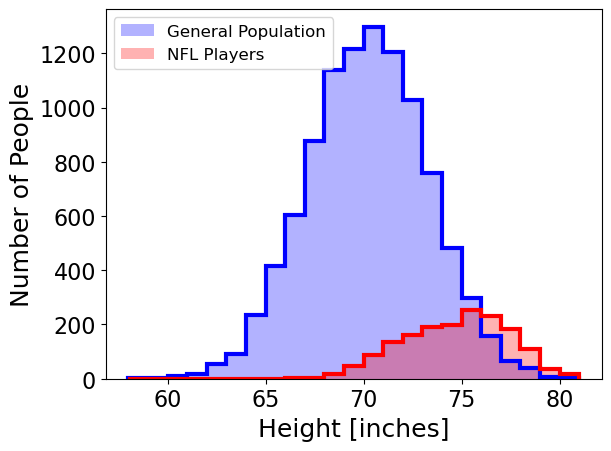

In [24]:
height_distro_all = pd.DataFrame(np.random.normal(70.23622, 3, 10000), columns=['height'])

height_min = int(np.min(height_distro_all))
height_max = np.max(nfl['height_inches'])

bins_all = np.arange(height_min, height_max+1, 1)

plt.hist(height_distro_all['height'], bins=bins_all, histtype='step', lw=3, color='blue')
plt.hist(height_distro_all['height'], bins=bins_all, alpha=0.3, color='blue', label='General Population')

plt.hist(nfl['height_inches'], bins=bins_all, histtype='step', lw=3, color='red')
plt.hist(nfl['height_inches'], bins=bins_all, alpha=0.3, color='red', label='NFL Players')
plt.xlabel('Height [inches]')
plt.ylabel('Number of People')
plt.legend(fontsize=12)
plt.show()

It's already obvious that the NFL players are taller than average people, but to get a fairer comparison visually, let's "normalize" these histograms. This makes it so that the entire area under the histogram is equal to 1, which has the effect of taking two different distributions and putting them on equal footing even if they have a different number of samples. We can do that by just setting the density keyword equal to True in the histograms.

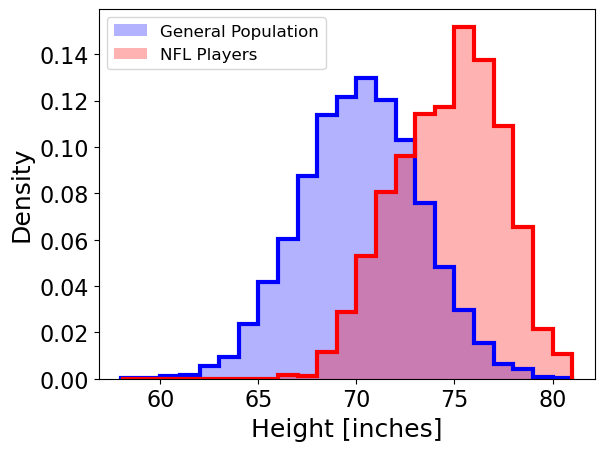

In [25]:
plt.hist(height_distro_all['height'], bins=bins_all, histtype='step', lw=3, color='blue', density=True)
plt.hist(height_distro_all['height'], bins=bins_all, alpha=0.3, color='blue', label='General Population', density=True)

plt.hist(nfl['height_inches'], bins=bins_all, histtype='step', lw=3, color='red', density=True)
plt.hist(nfl['height_inches'], bins=bins_all, alpha=0.3, color='red', label='NFL Players', density=True)
plt.legend(fontsize=12)
plt.xlabel('Height [inches]')
plt.ylabel('Density')
plt.show()

There are statistical tests that we could do here to compare these distributions, and we'll cover some of those in a future lesson. But for now, let's come up with some more intuitive tests that we can do using some of the statistics we've defined to check this together! Take a few minutes and see if you can convince yourself that NFL players are taller than the general population.

In [26]:
nfl_median = np.median(nfl['height_inches'])
general_median = np.median(height_distro_all['height'])

print('NFL Median:', nfl_median)
print('General Median:', general_median)

NFL Median: 74.0
General Median: 70.26704374828037


In [27]:
nfl_mean = np.mean(nfl['height_inches'])
general_mean = np.mean(height_distro_all['height'])

print('NFL Mean:', nfl_mean)
print('General Mean:', general_mean)

NFL Mean: 74.19594997022037
General Mean: 70.2359667817514


# Categorical variables

So far, all of our focus within our NFL dataset has been focused on the entire "population" of NFL players, but we're leaving a ton of information in there about sub-populations that could also be the target of interesting questions. You'll find that the same is true in the galaxy zoo catalog--galaxies are an extremely broad category, and investigating that diversity is a huge part of studying them.

Let's take another look at our NFL player database.

In [28]:
nfl

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,height_inches
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,76.0
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,77.0
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,76.0
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,74.0
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,74.0
...,...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaN,NaN,DT,Forrest Merrill,73.0
1675,53994,6-5,300,NaN,NaN,C,Ryan McCollum,77.0
1676,53999,6-4,312,NaN,NaN,DT,Jack Heflin,76.0
1677,54006,6-6,330,NaN,NaN,T,Jake Curhan,78.0


There's lots of info in there that isn't just "numbers". What sticks out the most to me is the "officialPosition" column, which tells us what position the player plays. Let's take a look at the values in there. We can do so with the pandas .unique() function.

In [29]:
nfl['officialPosition'].unique()

array(['QB', 'T', 'TE', 'WR', 'DE', 'SS', 'C', 'FS', 'NT', 'DT', 'CB',
       'G', 'OLB', 'RB', 'MLB', 'ILB', 'LB', 'FB', 'DB'], dtype=object)

In [31]:
nfl

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,height_inches
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,76.0
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,77.0
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,76.0
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,74.0
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,74.0
...,...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaN,NaN,DT,Forrest Merrill,73.0
1675,53994,6-5,300,NaN,NaN,C,Ryan McCollum,77.0
1676,53999,6-4,312,NaN,NaN,DT,Jack Heflin,76.0
1677,54006,6-6,330,NaN,NaN,T,Jake Curhan,78.0


Often, you'll want to create a new data set that only contains certain categorical variables. We can do this using masks in pandas. Let's get a dataframe that only has the quarterbacks and take a look at their height distribution compared to the entire league. Before we do so, let's come up with a hypothesis: do we think that quarterbacks are taller than average, shorter than average, or the same as average.

In [30]:
QBs = nfl[nfl['officialPosition']=='QB']

QBs

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,height_inches
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,76.0
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,77.0
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,74.0
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,74.0
7,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan,76.0
11,33138,6-3,222,1985-07-02,Michigan,QB,Chad Henne,75.0
12,33241,6-3,219,05/15/1986,San Diego,QB,Josh Johnson,75.0
14,34452,6-3,220,1988-02-07,Georgia,QB,Matthew Stafford,75.0
21,34843,6-2,215,1985-10-13,Michigan State,QB,Brian Hoyer,74.0
51,37083,6-4,235,1989-10-15,Missouri,QB,Blaine Gabbert,76.0


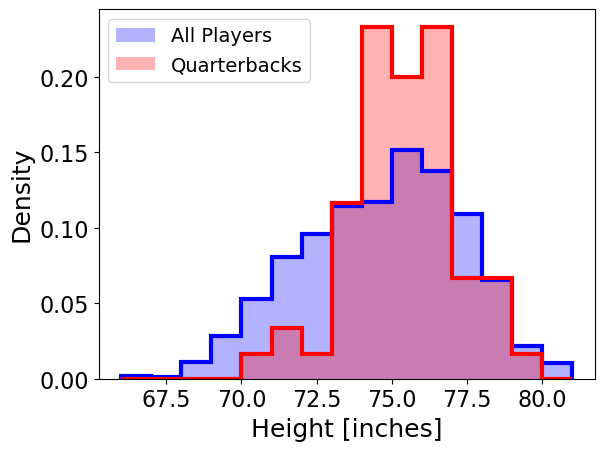

In [32]:
bins_nfl = np.arange(np.min(nfl['height_inches']), np.max(nfl['height_inches'])+1, 1)

plt.hist(nfl['height_inches'], bins=bins_nfl, color='blue', histtype='step', lw=3, density=True)
plt.hist(nfl['height_inches'], bins=bins_nfl, color='blue', alpha=0.3, label='All Players', density=True)
plt.hist(QBs['height_inches'], bins=bins_nfl, color='red', histtype='step', lw=3, density=True)
plt.hist(QBs['height_inches'], bins=bins_nfl, color='red', alpha=0.3, label='Quarterbacks', density=True)
plt.legend(fontsize=14)
plt.xlabel('Height [inches]')
plt.ylabel('Density')
plt.show()

Now that we've seen the data, is our hypothesis any different? Let's come up with a way to test this together!

In [33]:
nfl_median = np.median(nfl['height_inches'])
QB_median = np.median(QBs['height_inches'])

print('NFL Median', nfl_median)
print('QB Median', QB_median)

NFL Median 74.0
QB Median 75.0


Now, let's take a look at offensive tackles instead of quarterbacks. Do we have a hypothesis here?

In [34]:
tackles = nfl[nfl['officialPosition']=='T']

tackles

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,height_inches
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,76.0
6,30869,6-7,330,1981-12-12,Louisiana State,T,Andrew Whitworth,79.0
8,33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown,76.0
15,34457,6-4,330,1987-01-25,Alabama,T,Andre Smith,76.0
24,35443,6-5,320,1988-07-19,Oklahoma,T,Trent Williams,77.0
...,...,...,...,...,...,...,...,...
1595,53584,6-5,315,NaN,NaN,T,Jaylon Moore,77.0
1599,53590,6-8,315,NaN,NaN,T,Tommy Doyle,80.0
1628,53635,6-7,305,NaN,NaN,T,Landon Young,79.0
1658,53868,6-6,315,NaN,NaN,T,Alaric Jackson,78.0


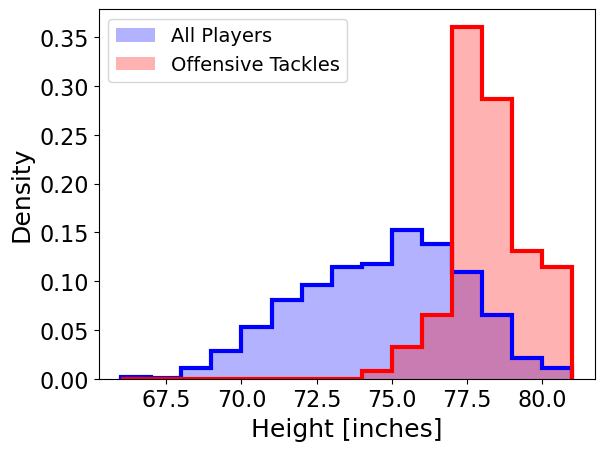

In [35]:
bins_nfl = np.arange(np.min(nfl['height_inches']), np.max(nfl['height_inches'])+1, 1)

plt.hist(nfl['height_inches'], bins=bins_nfl, color='blue', histtype='step', lw=3, density=True)
plt.hist(nfl['height_inches'], bins=bins_nfl, color='blue', alpha=0.3, label='All Players', density=True)
plt.hist(tackles['height_inches'], bins=bins_nfl, color='red', histtype='step', lw=3, density=True)
plt.hist(tackles['height_inches'], bins=bins_nfl, color='red', alpha=0.3, label='Offensive Tackles', density=True)
plt.legend(fontsize=14)
plt.xlabel('Height [inches]')
plt.ylabel('Density')
plt.show()

# Some ways to keep working with this data set

Now that you have some familiarity with the data set, come up with a science question of your own and test it! A few ides:

-What position is the shortest?

-Rank the positions in order from shortest to tallest

-Are offensive players taller than defensive players?

-Which position is the heaviest? Which is the lightest? Are the answers for these questions the same as for height?

In [36]:
mask = nfl['team']=='Cowboys'

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,height_inches
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,76.0
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,77.0
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,76.0
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,74.0
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,74.0
...,...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaN,NaN,DT,Forrest Merrill,73.0
1675,53994,6-5,300,NaN,NaN,C,Ryan McCollum,77.0
1676,53999,6-4,312,NaN,NaN,DT,Jack Heflin,76.0
1677,54006,6-6,330,NaN,NaN,T,Jake Curhan,78.0
